<a href="https://colab.research.google.com/github/emmim25/Group08_Project/blob/main/EmilyMunro_Individual_Model_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Individual Model Code 

## Regression Models

In [25]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os

data = pd.read_csv('https://raw.githubusercontent.com/emmim25/Group08_Project/main/Regression_QSAR_Bioconcentration.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


In [26]:

data.drop(['SMILES'], axis = 1, inplace = True)
data.drop(['Set'], axis=1, inplace=True)
data.drop(['CAS'], axis=1, inplace=True)
data.drop(['Class'], axis =1, inplace= True)
data.head()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],logBCF
0,0,0.0,1.49,0.14,1.35,0.72,0,1,5,0.74
1,0,0.0,1.47,0.14,1.70,0.88,0,1,5,0.93
2,0,0.0,1.20,0.25,4.14,2.06,0,0,0,3.24
3,0,0.0,1.69,0.13,1.89,0.79,0,1,8,-0.40
4,0,0.0,0.52,0.25,2.65,1.31,0,0,0,2.24


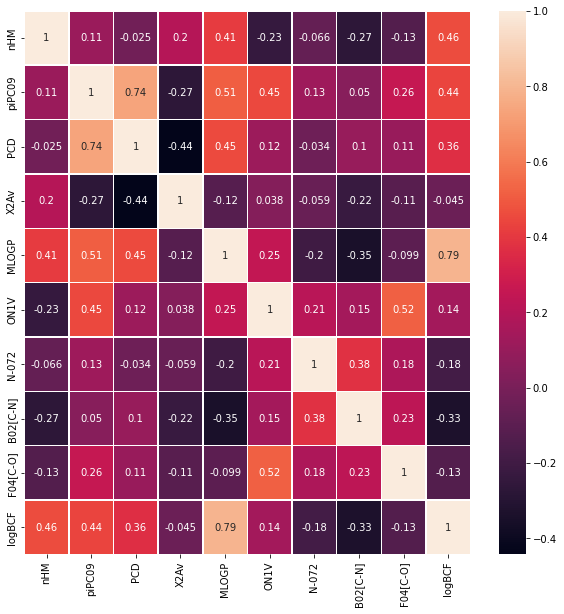

In [27]:
data.corr()
fig, axes = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

Data Splitting and Pre-Processing (80% Train, 20% Test)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score  
from sklearn.metrics import mean_squared_error  
from math import sqrt  
from sklearn.preprocessing import StandardScaler 

x = data.drop(['logBCF'], axis =1)
y = data.logBCF.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Bayesian Ridge Model

Test Accuracy for Bayesian Ridge Model:  0.6161874286084641
RMSE for Testing Data:  0.8249241527747122


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bayesian Ridge Model')

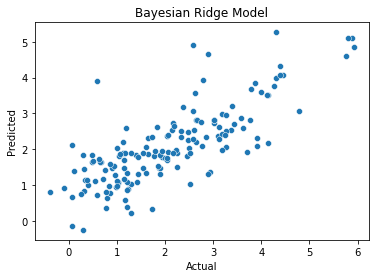

In [29]:
from sklearn.linear_model import BayesianRidge

BR=BayesianRidge(n_iter=200)
BR.fit(x_train,y_train)

y_predict_test = BR.predict(x_test)

accuracy_BR_test = r2_score(y_test, y_predict_test)
print("Test Accuracy for Bayesian Ridge Model: ", accuracy_BR_test)

RMSE_BR_test = sqrt(mean_squared_error(y_test,y_predict_test))
print("RMSE for Testing Data: ", RMSE_BR_test)

sns.scatterplot(y_test,y_predict_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Bayesian Ridge Model")

K Nearest Neighbours Model

(array([0]),)
3


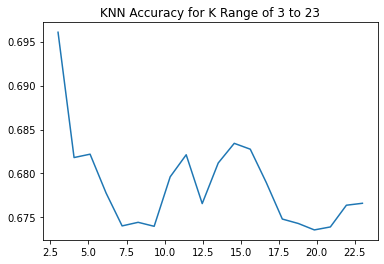

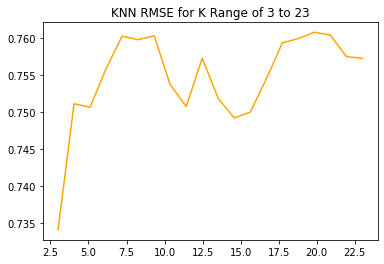

In [30]:
from sklearn import neighbors

#Finding optimum number of neighbours 
accuracy_kNN = np.zeros(20)
RMSE_kNN=np.zeros(20)
for i in range(3,23): 
  kNN_data = neighbors.KNeighborsRegressor(i, weights = 'distance')

  kNN_data.fit(x_train, y_train)

  y_predict_test = kNN_data.predict(x_test)

  accuracy_kNN_test = r2_score(y_test, y_predict_test)
  accuracy_kNN[i-3]=accuracy_kNN_test
  RMSE_kNN[i-3] = sqrt(mean_squared_error(y_test, y_predict_test))

kspan = np.linspace(3,23, num=20 )
plt.figure(0)
plt.title('KNN Accuracy for K Range of 3 to 23')
plt.plot(kspan, accuracy_kNN)
plt.figure(1)
plt.plot(kspan, RMSE_kNN, color='orange')
plt.title('KNN RMSE for K Range of 3 to 23')

k_optimum_index = np.where(accuracy_kNN == np.max(accuracy_kNN))
print(k_optimum_index)
k_optimum = 0 + 3 
print(k_optimum)

kNN_data = neighbors.KNeighborsRegressor(k_optimum, weights = 'distance')
kNN_data.fit(x_train, y_train)
y_predict_test = kNN_data.predict(x_test)

Testing Accuracy for K Nearest Neighbors Model:  0.6960631667400236
RMSE for Testing Data:  0.7340845584837142


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

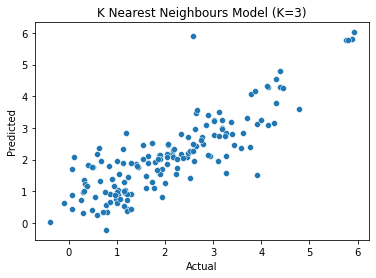

In [31]:
accuracy_kNN_test = r2_score(y_test, y_predict_test)
print("Testing Accuracy for K Nearest Neighbors Model: ", accuracy_kNN_test)

RMSE_kNN_test = sqrt(mean_squared_error(y_test, y_predict_test))
print("RMSE for Testing Data: ", RMSE_kNN_test)

sns.scatterplot(y_test, y_predict_test)
plt.title("K Nearest Neighbours Model (K=3)")
plt.xlabel('Actual')
plt.ylabel('Predicted')

Neural Network Model

Testing Accuracy for Neural Network Model:  0.6866614742542492
RMSE for Testing Data:  0.745351825593272


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted')

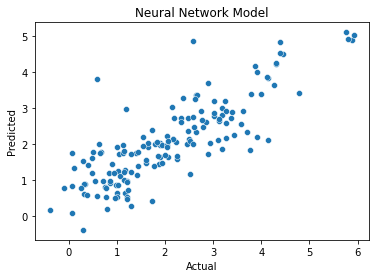

In [32]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state = 50, max_iter = 800, activation='relu', solver='adam').fit(x_train, y_train)

y_predict_mlp_test = MLP.predict(x_test)

accuracy_mlp_test = r2_score(y_test, y_predict_mlp_test)
print("Testing Accuracy for Neural Network Model: ", accuracy_mlp_test)

RMSE_mlp_test = sqrt(mean_squared_error(y_test, y_predict_mlp_test))
print("RMSE for Testing Data: ", RMSE_mlp_test)

sns.scatterplot(y_test,y_predict_mlp_test)
plt.title('Neural Network Model')
plt.xlabel("Actual")
plt.ylabel('Predicted')

## Classification Models

In [33]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import sklearn
import os

data = pd.read_csv('https://raw.githubusercontent.com/emmim25/Group08_Project/main/Classification_Diabetes_Dataset.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


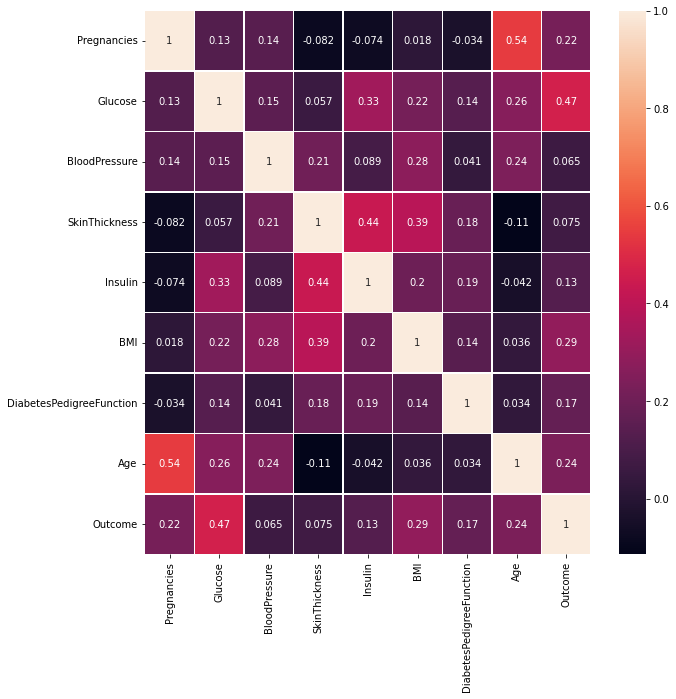

In [35]:
data.corr()
fig, axes = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

Data Splitting and Pre-Processing (80% Train, 20% Test)

In [36]:
import imblearn 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

x = data.drop(['Outcome'], axis =1)
y = data.Outcome.values

resample = RandomUnderSampler(random_state=42,replacement=True)
x,y=resample.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

K Nearest Neighbours Model

(array([22, 23, 24]),)
25
Test Accuracy: 0.8240740740740741


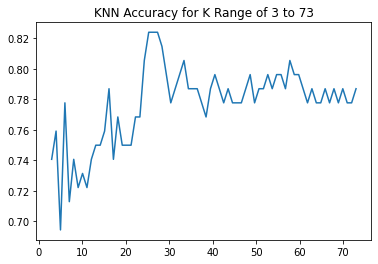

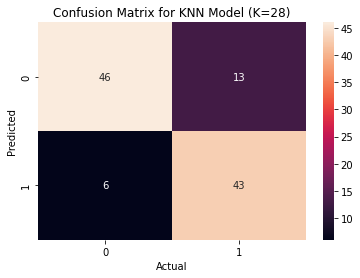

In [37]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix

accuracy_kNN = np.zeros(70)

for i in range(3,73): 
  kNN = neighbors.KNeighborsClassifier(i, weights = 'uniform')

  kNN.fit(x_train, y_train)

  y_predict_test = kNN.predict(x_test)
  actual_test = y_test
  predicted_test = y_predict_test 
  test_matrix = confusion_matrix(actual_test, predicted_test)
  accuracy_kNN[i-3] = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])

k=np.linspace(3,73,num=70)
plt.figure(0)
plt.title('KNN Accuracy for K Range of 3 to 73')
plt.plot(k, accuracy_kNN)


k_optimum_index = np.where(accuracy_kNN == np.max(accuracy_kNN))
print(k_optimum_index)
k_optimum = 22 + 3 
print(k_optimum)

kNN = neighbors.KNeighborsClassifier(k_optimum, weights='uniform')

kNN.fit(x_train, y_train)

y_predict_test = kNN.predict(x_test)

actual_test = y_test
predicted_test = y_predict_test 

test_matrix = confusion_matrix(actual_test, predicted_test)
plt.figure(1)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for KNN Model (K=28)")
test_accuracy_kNN = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_kNN)

Random Forest Model

Test Accuracy: 0.8055555555555556


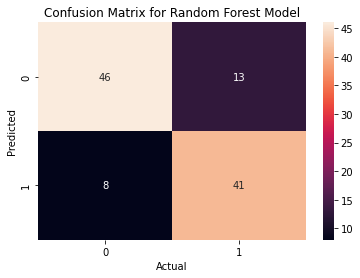

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 1200, max_depth = 30)

forest.fit(x_train, y_train)

y_predict_ens_test = forest.predict(x_test)

actual_test = y_test
predicted_test = y_predict_ens_test 

test_matrix = confusion_matrix(actual_test, predicted_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Random Forest Model")
test_accuracy_RF = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy_RF)

Multilayer Perceptron (Neural Network) Model

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test Accuracy: 0.7870370370370371


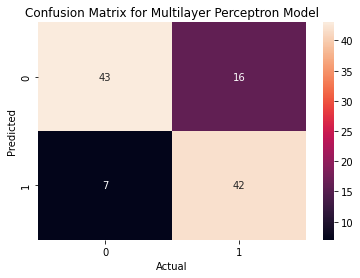

In [39]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(random_state = 0, max_iter = 1000, activation='relu', solver='adam').fit(x_train, y_train)

y_predict_mlp_test = MLP.predict(x_test)

actual_test = y_test
predicted_test = y_predict_mlp_test 

test_matrix = confusion_matrix(actual_test, predicted_test)
sns.heatmap(test_matrix, annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Confusion Matrix for Multilayer Perceptron Model")
test_accuracy = (test_matrix[0,0]+test_matrix[1,1])/(test_matrix[0,0]+test_matrix[0,1]+test_matrix[1,0]+test_matrix[1,1])
print('Test Accuracy:', test_accuracy)